<a href="https://colab.research.google.com/github/Deltan2002/pytorch/blob/main/foeedforward_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
  MNIST
  dataloader, transformation
  multilaer nn, activation function
  loss and optimizer
  training loop(batches)
  model evaluation

'''

'\n  MNIST\n  dataloader, transformation\n  multilaer nn, activation function\n  loss and optimizer\n  training loop(batches)\n  model evaluation\n\n'

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# hyperparameters

input_size = 784 #28x28 is the size of the image
hidden_size = 100
num_classes = 10 #0-9 digits
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [11]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,  shuffle=False)



examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,  labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


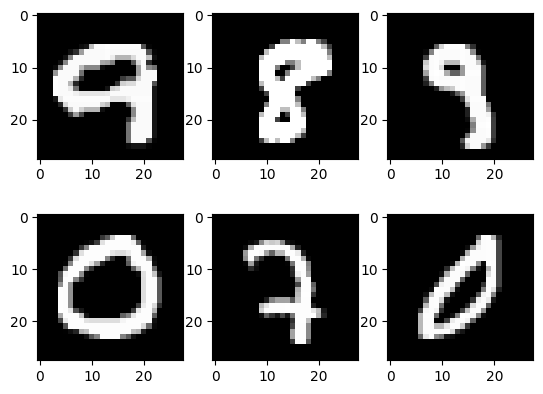

In [17]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [20]:
# NEAURAL NET

class NeuralNet(nn.Module):
  def __init__(self, input_size,output_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,output_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out



model = NeuralNet(input_size, hidden_size, num_classes)

In [21]:
# loss and optimzer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)




In [22]:
#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    #100,1,28,28
    #100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)


    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)


    #backward

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')







epoch 1 / 2, step 100/600, loss= 0.3661
epoch 1 / 2, step 200/600, loss= 0.2608
epoch 1 / 2, step 300/600, loss= 0.2660
epoch 1 / 2, step 400/600, loss= 0.3019
epoch 1 / 2, step 500/600, loss= 0.1978
epoch 1 / 2, step 600/600, loss= 0.2841
epoch 2 / 2, step 100/600, loss= 0.2753
epoch 2 / 2, step 200/600, loss= 0.2193
epoch 2 / 2, step 300/600, loss= 0.2099
epoch 2 / 2, step 400/600, loss= 0.1202
epoch 2 / 2, step 500/600, loss= 0.2143
epoch 2 / 2, step 600/600, loss= 0.1856


In [24]:
#test

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct +=(predictions==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print('Accuracy:',acc)

Accuracy: 95.1
